In [1]:
import sys
sys.path.insert(0, "C://Users//MSI//Desktop//OmSTU//MachineLearning//models//Regression")
sys.path.insert(0, "C://Users//MSI//Desktop//OmSTU//MachineLearning//models//DecisionTrees")
from error_metrics import MAE, MSE, RMSE, MAPE, R2

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
def regression_report(y_true, y_pred):
    print("MAE:", MAE(y_true, y_pred))
    print("MSE:", MSE(y_true, y_pred))
    print("RMSE:", RMSE(y_true, y_pred))
    print("MAPE:", MAPE(y_true, y_pred))
    print("R^2:", R2(y_true, y_pred))

# Задание 1
Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.

In [3]:
param_grid = {"max_depth" : np.arange(1, 10, 1)}

In [3]:
classify_data = pd.read_csv('..\data\card_transdata.csv').sample(1000)
classify_target = classify_data["fraud"]
classify_predicators = classify_data.drop(columns=["fraud"])

X_train_classify, X_test_classify, y_train_classify, y_test_classify = train_test_split(
    classify_predicators, classify_target, test_size = 0.1)

In [4]:
regression_data = pd.read_csv('..\data\kc_house_data_preprocessed.csv').drop(columns="Unnamed: 0").sample(1000)
regression_target = regression_data["price"]
regression_predicators = regression_data.drop(columns=["price"])

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    regression_predicators, regression_target, test_size=0.3)

In [6]:
dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
dtc.fit(X_train_classify, y_train_classify)
y_pred_classify = dtc.predict(X_test_classify)

print(classification_report(y_pred_classify, y_test_classify))
print(dtc.best_estimator_)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        92
         1.0       0.89      1.00      0.94         8

    accuracy                           0.99       100
   macro avg       0.94      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100

DecisionTreeClassifier(max_depth=6)


In [7]:
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)
dtr.fit(X_train_regression, y_train_regression)
y_pred_regression = dtr.predict(X_test_regression)

regression_report(y_test_regression, y_pred_regression)
print(dtr.best_estimator_)

MAE: 124526.54225108931
MSE: 43709980791.840416
RMSE: 209069.32054187293
MAPE: 0.21866407605146393
R^2: 0.6557107861995717
DecisionTreeRegressor(max_depth=4)


# Задание 2
 2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor

### Bagging

In [8]:
param_grid = {"max_features": np.arange(0.1, 1, 0.1),
              "max_samples": np.arange(0.1, 1, 0.1)}

In [9]:
bc = GridSearchCV(BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators=11), param_grid=param_grid)
bc.fit(X_train_classify, y_train_classify)
y_pred_bc = bc.predict(X_test_classify)

print(classification_report(y_pred_bc, y_test_classify))
print(bc.best_estimator_)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        92
         1.0       0.89      1.00      0.94         8

    accuracy                           0.99       100
   macro avg       0.94      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.9,
                  max_samples=0.9, n_estimators=11)


In [10]:
br = GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=11), param_grid=param_grid)
br.fit(X_train_regression, y_train_regression)
y_pred_br = br.predict(X_test_regression)

regression_report(y_test_regression, y_pred_br)
print(br.best_estimator_)

MAE: 99998.87696969698
MSE: 31687463484.78104
RMSE: 178009.7286239745
MAPE: 0.1844501927170343
R^2: 0.7504082204368845
BaggingRegressor(estimator=DecisionTreeRegressor(),
                 max_features=0.7000000000000001,
                 max_samples=0.7000000000000001, n_estimators=11)


### GradientBoosting

In [11]:
param_grid = {"learning_rate" : np.arange(0.1, 1, 0.1),
              "max_depth" : np.arange(1, 10, 1)}

In [12]:
gbc = GridSearchCV(GradientBoostingClassifier(n_estimators=11), param_grid=param_grid)
gbc.fit(X_train_classify, y_train_classify)
y_pred_gbc = gbc.predict(X_test_classify)

print(classification_report(y_pred_gbc, y_test_classify))
print(gbc.best_estimator_)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        92
         1.0       0.89      1.00      0.94         8

    accuracy                           0.99       100
   macro avg       0.94      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100

GradientBoostingClassifier(max_depth=5, n_estimators=11)


In [13]:
gbr = GridSearchCV(GradientBoostingRegressor(n_estimators=11), param_grid=param_grid)
gbr.fit(X_train_regression, y_train_regression)
y_pred_gbr = gbr.predict(X_test_regression)

regression_report(y_test_regression, y_pred_gbr)
print(gbr.best_estimator_)

MAE: 95451.88551113868
MSE: 30496761353.52384
RMSE: 174633.2195016854
MAPE: 0.1646893572621751
R^2: 0.7597869914455774
GradientBoostingRegressor(learning_rate=0.30000000000000004, max_depth=4,
                          n_estimators=11)


### Stacking

In [14]:
estimators_classify = [('rfc', RandomForestClassifier(n_estimators=11, random_state=0)),
                       ('dcc', DecisionTreeClassifier(max_depth=5))]

estimators_regression = [('rfr', RandomForestRegressor(n_estimators=11, random_state=0)),
                         ('dcr', DecisionTreeRegressor(max_depth=5))]

In [15]:
sc = StackingClassifier(estimators=estimators_classify, final_estimator=LogisticRegression())
sc.fit(X_train_classify, y_train_classify)
y_pred_sc = sc.predict(X_test_classify)

print(classification_report(y_pred_sc, y_test_classify))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        92
         1.0       0.89      1.00      0.94         8

    accuracy                           0.99       100
   macro avg       0.94      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100



In [16]:
sr = StackingRegressor(estimators=estimators_regression, final_estimator=LinearRegression())
sr.fit(X_train_regression, y_train_regression)
y_pred_sr = sr.predict(X_test_regression)

regression_report(y_test_regression, y_pred_sr)

MAE: 93121.2772585138
MSE: 24653379262.24267
RMSE: 157013.94607563582
MAPE: 0.16788926538332116
R^2: 0.8058133998241016


# Задание 3

In [9]:
from catboost import CatBoostClassifier
cat_classify = CatBoostClassifier(verbose=False)
cat_classify.fit(X_train_classify, y_train_classify)
y_pred_cat_classify = cat_classify.predict(X_test_classify)

print(classification_report(y_pred_cat_classify, y_test_classify))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        90
         1.0       1.00      0.90      0.95        10

    accuracy                           0.99       100
   macro avg       0.99      0.95      0.97       100
weighted avg       0.99      0.99      0.99       100



In [8]:
from catboost import CatBoostRegressor
cat_regression = CatBoostRegressor(verbose=False)
cat_regression.fit(X_train_regression, y_train_regression)
y_pred_cat_regression = cat_regression.predict(X_test_regression)

regression_report(y_pred_cat_regression, y_test_regression)

MAE: 74996.47444135485
MSE: 17173310447.960814
RMSE: 131046.97801918522
MAPE: 0.15075637721353538
R^2: 0.7182406595689153


# Задание 4

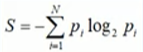 - энтропия <br>
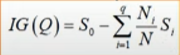 - информационный выйгрыш

In [8]:
from decision_tree_classifier import DecisionTreeClassifierModel

dtcm = DecisionTreeClassifierModel(max_depth = 8)
dtcm.fit(X_train_classify, y_train_classify)
y_pred_dtcm = dtcm.predict(X_test_classify)

print(classification_report(y_pred_dtcm, y_test_classify))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        93
         1.0       1.00      0.86      0.92         7

    accuracy                           0.99       100
   macro avg       0.99      0.93      0.96       100
weighted avg       0.99      0.99      0.99       100



In [21]:
from decision_tree_regressor import DecisionTreeRegressorModel

dtrm = DecisionTreeRegressorModel(max_depth = 8)
dtrm.fit(X_train_regression, y_train_regression)
y_pred_dtrm = dtrm.predict(X_test_regression)

regression_report(y_pred_dtrm, y_test_regression)

MAE: 152761.81575396826
MSE: 58808167574.047134
RMSE: 242503.95372869106
MAPE: 0.27922206619868695
R^2: 0.3321271395884653
